# Simple MNIST MLP Classifier with regularization

**Description:** Simple example for Multi Layer Perceptron MNIST Classifier included several regularization 
examples like dropout, learning rate, early stopping<br>
This example has larger layers and more complex training<br>
**Dataset:** Classical MNIST dataset <br>
.

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages

import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras.models import Model


def Analyze_training(h):
# summarize history for accuracy
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

In [11]:
# layers structure
batch_size = 256
epochs = 10
hlayer1 = 1024
hlayer2 = 1024
hlayer3 = 256

    Prepare Data

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [13]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

In [14]:
def get_MLP():
    
    # iput layer
    inputs = layers.Input(shape=(784,))
    # first hidden layer
    x = layers.Dense(hlayer1, activation='relu')(inputs)
    x = layers.Dropout(0.1)(x)
    # second hidden layer
    x = layers.Dense(hlayer2, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    # third hidden layer
    x = layers.Dense(hlayer3, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    #Final Layer (Output)
    output = layers.Dense(10, activation='softmax')(x)
    
    model = Model(inputs=[inputs], outputs=output)
    
    return model

In [15]:
initial_learning_rate = 0.001
lr_bespoke = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [16]:
model = get_MLP()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(learning_rate=lr_bespoke), metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0   

#####    Definition of a Simple [784:64:64:10] Network

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 6s 24ms/step - loss: 0.2967 - accuracy: 0.9075 - val_loss: 0.2211 - val_accuracy: 0.9282
Epoch 2/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1001 - accuracy: 0.9700 - val_loss: 0.0882 - val_accuracy: 0.9721
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0681 - accuracy: 0.9792 - val_loss: 0.0685 - val_accuracy: 0.9804
Epoch 4/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0893 - val_accuracy: 0.9773
Epoch 5/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.1033 - val_accuracy: 0.9770
Epoch 6/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0768 - val_accuracy: 0.9820
Epoch 7/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0738 - val_accuracy: 0.9833

Test loss: 0.11080320179462433
Test accuracy: 0.9797999858856201
Train accuracy: 0.9947166442871094


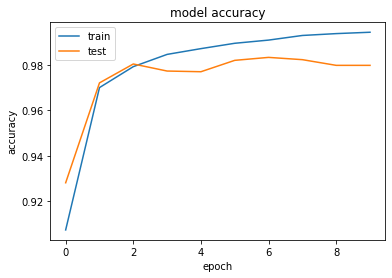

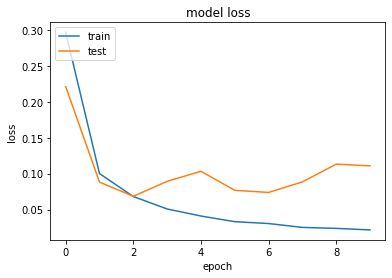

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)